<h1><center>Desafio Lighthouse</center></h1>

<h3><center>Victor Diallen Andrade do Amaral</center></h3>

# Sumário:
* [1. Introdução](#section1)
* [2. Importando Bibliotecas](#section2)
* [3. Dataset e Análises Iniciais](#section3)
* [4. Pré-Processamento de Dados](#section4)
* [5. Análise Exploratória de Dados (EDA)](#section5)
* [6. Machine Learning](#section6)
* [7. Introduzindo Novos Dados](#section7)
* [8. Entregas](#section8)

<a id="section1"></a>
# Introdução

## Desafio

- Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).


## Descrição das Variáveis

- **Series_Title** – Nome do filme
- **Released_Year** - Ano de lançamento
- **Certificate** - Classificação etária
- **Runtime** – Tempo de duração
- **Genre** - Gênero
- **IMDB_Rating** - Nota do IMDB
- **Overview** - Overview do filme
- **Meta_score** - Média ponderada de todas as críticas 
- **Director** – Diretor
- **Star1** - Ator/atriz #1
- **Star2** - Ator/atriz #2
- **Star3** - Ator/atriz #3
- **Star4** - Ator/atriz #4
- **No_of_Votes** - Número de votos
- **Gross** - Faturamento


<a id="section2"></a>
# Importando Bibliotecas

In [1]:
# Ignorar mensagens de aviso
import warnings
warnings.filterwarnings("ignore")

In [39]:
# Criar requirements.txt
import pipreqsnb

# Análise e Pré-Processamento de Dados
import pandas as pd
import numpy as np

# Plotagem de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Manipulação de Strings
import string

# Processamento de Linguagem Natural
from wordcloud import WordCloud

# Aprendizado de Máquina e Inteligência Artificial
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Criar Arquivo .pkl
import pickle

In [ ]:
# Cria Arquivo com Bibliotecas Utilizadas
#!pipreqsnb .

<a id="section3"></a>
# Dataset e Análises Iniciais

In [4]:
# Carregando Dataset
df = pd.read_csv('desafio_indicium_imdb.csv', thousands=',')

In [5]:
# Dimensões do Dataset
df.shape

(999, 16)

In [6]:
# Informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.0+ KB


In [7]:
# Resumo Estatístico do Dataset
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05,6.808257e+07
std,288.530761,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,250.500000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,500.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,749.500000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,999.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [8]:
# Visualização do Dataframe Criado
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


<a id="section4"></a>
# Pre-processamento de Dados

In [9]:
# Apagar a Coluna de Indexação Inicial
df = df.drop(columns=df.columns[0], axis=1)

In [10]:
# Checagem de Dados Duplicados
df.duplicated().sum()

0

In [11]:
# Checagem de Dados Nulos
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [12]:
# Apagando Dados Nulos
df = df.dropna()

In [13]:
# Criando Cópia do Dataframe Original
df_new = df.copy()

In [14]:
# Transformando a Coluna Gross para Tipo Numérico
df_new['Gross'] = pd.to_numeric(df_new['Gross'])

In [15]:
# Transformando a Coluna Runtime para Tipo Numérico e Editando seu Nome
df_new = df_new.rename(columns={'Runtime': 'Runtime_min'})
df_new['Runtime_min'] = df_new['Runtime_min'].str.replace(' min','')
df_new['Runtime_min'] = pd.to_numeric(df_new['Runtime_min'])

In [16]:
# Transformando a Coluna Released_Year para Tipo Numérico e Editando Valor Desconhecido para Valor Real
df_new['Released_Year'] = df_new['Released_Year'].str.replace('PG','1995')
df_new['Released_Year'] = pd.to_numeric(df_new['Released_Year'])

In [17]:
# Dividindo a Coluna Genre em Três Partes
df_new[['Genre1', 'Genre2', 'Genre3']] = df_new.Genre.str.split(",", expand = True)
df_new['Genre2'] = df_new['Genre2'].fillna(df_new['Genre1'])
df_new['Genre3'] = df_new['Genre3'].fillna(df_new['Genre2'])
df_new.drop(columns=['Genre'], inplace=True)

In [18]:
df_new.head(3)

,Series_Title,Released_Year,Certificate,Runtime_min,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre1,Genre2,Genre3
0,The Godfather,1972,A,175,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,Drama,Drama
1,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,Crime,Drama
2,The Godfather: Part II,1974,A,202,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,Drama,Drama


<a id="section5"></a>
# Análise Exploratória dos Dados (EDA)

In [19]:
# Criando uma Cópia do Dataset Anterior para Análise Exploratória dos Dados
df_eda = df_new.copy()

In [20]:
# Criando Intervalos para a Coluna Runtime_min
bins = [0, 60, 80, 100, 120, 140, 160, 180, 300]
labels = ['<=60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '>180']
df_eda['Runtime_min'] = pd.cut(df_eda['Runtime_min'], bins=bins, labels=labels).astype(str)

In [21]:
# Criando Intervalos para a Coluna Meta_score
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<=10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_eda['Meta_score'] = pd.cut(df_eda['Meta_score'], bins=bins, labels=labels).astype(str)

In [22]:
# Criando Intervalos para a Coluna Released_Year
bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2024]
labels = ['<1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2010-2024']
df_eda['Released_Year'] = pd.cut(df_eda['Released_Year'], bins=bins, labels=labels).astype(str)

In [23]:
# Separando Colunas Numéricas
num_cols = df_eda.select_dtypes([np.number]).columns
df_nums = df_eda[num_cols].reset_index(drop=True)

In [24]:
# Separando Colunas Categóricas
cat_cols = df_eda.select_dtypes(['object']).columns
df_cats = df_eda[cat_cols].reset_index(drop=True)

## Análise Univariada

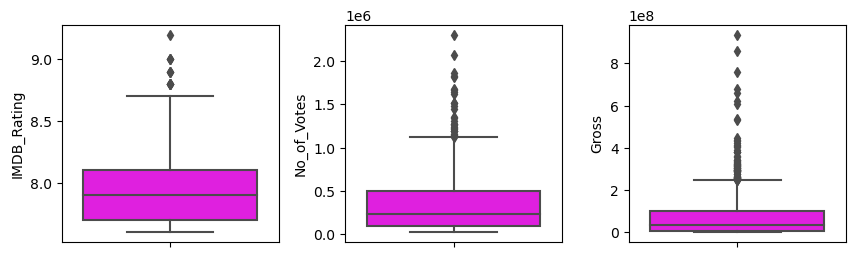

In [25]:
# Análise das Colunas Numéricas em Boxplots
features = num_cols.to_list()
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y = df_eda[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout();

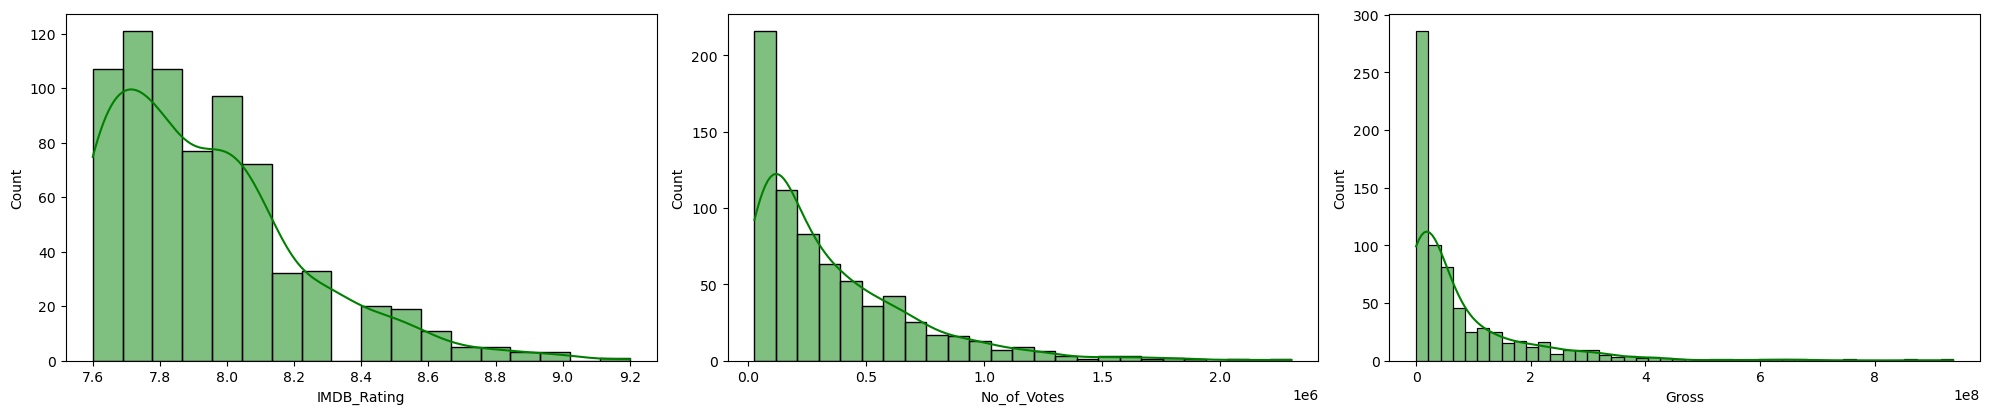

In [26]:
# Análise das Colunas Numéricas em Histplots
features = num_cols.to_list()
plt.figure(figsize = (20, 20))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x = df_eda[features[i]], kde = True, color = 'green')
    plt.tight_layout()

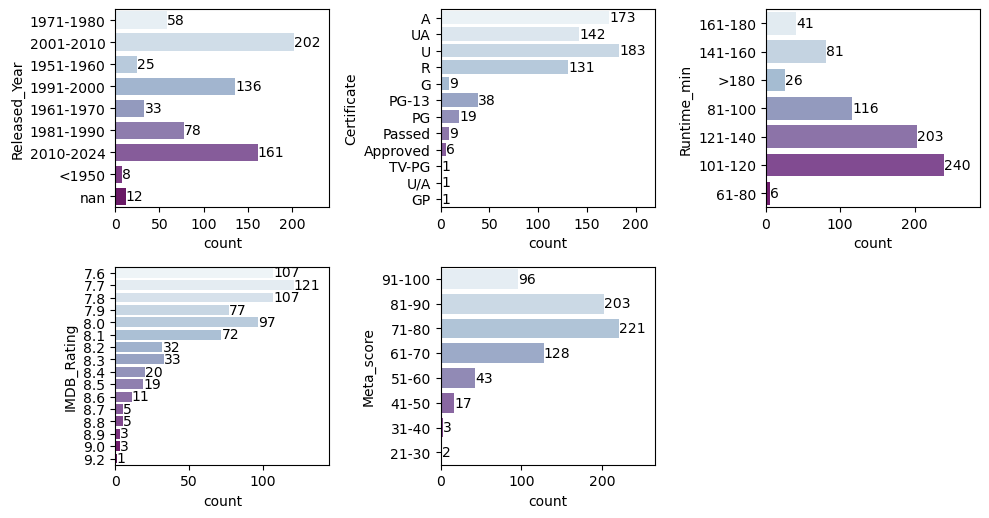

In [27]:
# Análise das Colunas Categóricas em Countplots
plt.figure(figsize=(10,10))
cat_cols_analysis = ['Released_Year', 'Certificate', 'Runtime_min','IMDB_Rating', 'Meta_score']
df_cats_analysis = df_eda[cat_cols_analysis].reset_index(drop=True)
for i in range(0, len(df_cats_analysis.columns)):
    plt.subplot(4, 3, i+1)
    ax = sns.countplot(y = df_eda[df_cats_analysis.columns[i]], palette = 'BuPu', orient = 'v')
    ax.set_xlim(0,df_eda[df_cats_analysis.columns[i]].value_counts().max()+df_eda[df_cats_analysis.columns[i]].value_counts().max()*0.2)
    ax.bar_label(ax.containers[0]);
    plt.tight_layout()

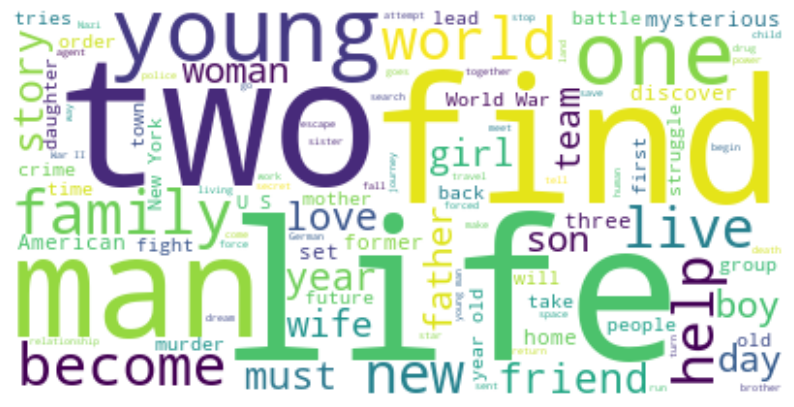

In [28]:
# Análise da Coluna Overview no Formato WordCloud para Conhecer as Palavras mais Repetidas
wordcloud_test = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(' '.join(df_new['Overview']))
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud_test, interpolation="bilinear")
plt.axis("off")
plt.show()

## Análise Bivariada

In [29]:
# Criando Cópia do Dataframe Anterior para Análise Bivariada
df_bivariate = df_eda.copy()
df_bivariate[df_cats.columns] = df_bivariate[df_cats.columns].apply(LabelEncoder().fit_transform)

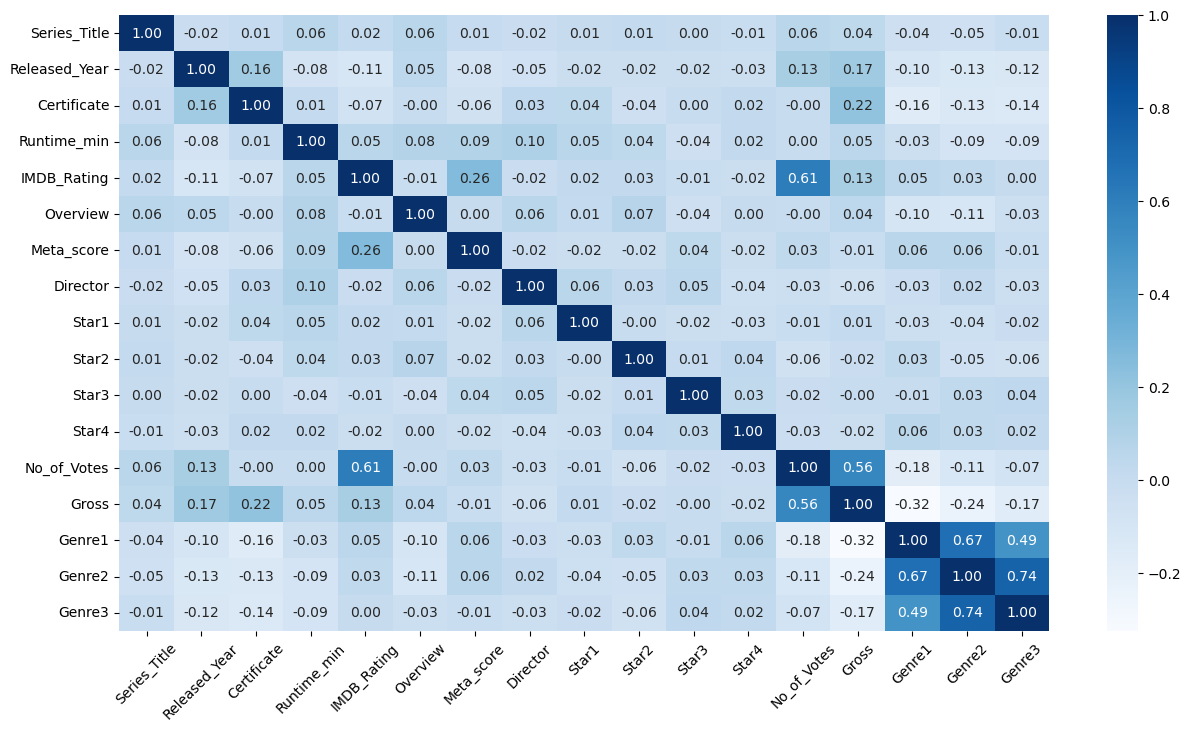

In [30]:
# Análise Bivariada da Relação 2 a 2 Entre Todas as Variáveis
plt.figure(figsize = (15, 8))
sns.heatmap(df_bivariate.corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.xticks(rotation=45);

In [31]:
# Utilizando o Algoritmo Random Forest para Classificação das Variáveis Mais Importantes
df_bivariate['IMDB_Rating'] = df_bivariate['IMDB_Rating'].astype(str)
X = df_bivariate.loc[:, df_bivariate.columns != 'IMDB_Rating']
y = df_bivariate['IMDB_Rating'].values

clf = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=9, n_jobs=-1)

clf.fit(X, y)

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

No_of_Votes      0.144204
Series_Title     0.087463
Gross            0.083183
Overview         0.072682
Star4            0.071531
Star1            0.071439
Star2            0.067431
Star3            0.066154
Director         0.061720
Meta_score       0.053765
Released_Year    0.052025
Genre3           0.044886
Runtime_min      0.039476
Genre2           0.034145
Genre1           0.027570
Certificate      0.022325
dtype: float64

<a id="section6"></a>
# Machine Learning

#### Seleção de Variáveis 1

In [32]:
# Selecionando Algumas Variáveis para Análise de Performance
imdb_pred_cols1 = ['No_of_Votes', 'Gross', 'Meta_score', 'Released_Year', 'Genre1', 'Star4', 'IMDB_Rating']
df_imdb1 = df_new[imdb_pred_cols1] 

In [33]:
# Dividindo em Dados de Treino e Teste
X1 = df_bivariate[['No_of_Votes', 'Gross', 'Meta_score', 'Released_Year', 'Genre1', 'Star4']]
y1 = df_bivariate['IMDB_Rating']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.15)

In [34]:
# Normalizando os Dados
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

#### Seleção de Variáveis 2

In [35]:
# Selecionando Algumas Variáveis para Análise de Performance
imdb_pred_cols2 = ['No_of_Votes', 'Gross', 'Meta_score', 'IMDB_Rating']
df_imdb2 = df[imdb_pred_cols2] 

In [36]:
# Dividindo em Dados de Treino e Teste
X2 = df_new[['No_of_Votes', 'Gross', 'Meta_score']]
y2 = df_new['IMDB_Rating']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.15)

In [37]:
# Normalizando os Dados
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

## Regressão Linear

In [40]:
# Criando modelo de Regressão Linear
model = linear_model.LinearRegression(fit_intercept = True)

### Usando Seleção de Variáveis 1

In [41]:
# Utilizando as Variáveis 1 para teste
model_v1_lm = model.fit(X1_train_scaled, y1_train)

In [42]:
prediction_v1 = model_v1_lm.fit(X1_train_scaled, y1_train).predict(X1_test_scaled)

In [43]:
# Calcula a Métrica R2 do Nosso Modelo
print("R2", r2_score(y1_test, prediction_v1))

R2 0.5274297193274525


In [44]:
# Calcula a Métrica MAE do Nosso Modelo
print("MAE", mean_absolute_error(y1_test, prediction_v1))

MAE 0.1676767935643392


In [45]:
# Calcula a Métrica MSE do Nosso Modelo
print("MSE", mean_squared_error(y1_test,prediction_v1))

MSE 0.04522624303720066


In [46]:
# Calcula a Métrica RMSE do Nosso Modelo
print("RMSE", np.sqrt(mean_squared_error(y1_test,prediction_v1)))

RMSE 0.2126646257307516


### Usando Seleção de Variáveis 2

In [47]:
# Utilizando as Variáveis 1 para teste
model_v2_lm = model.fit(X2_train_scaled, y2_train)

In [48]:
prediction_v2 = model_v2_lm.fit(X2_train_scaled, y2_train).predict(X2_test_scaled)

In [49]:
# Calcula a Métrica R2 do Nosso Modelo
print("R2", r2_score(y2_test, prediction_v2))

R2 0.34024815937422703


In [50]:
# Calcula a Métrica MAE do Nosso Modelo
print("MAE", mean_absolute_error(y2_test, prediction_v2))

MAE 0.18116248700953005


In [51]:
# Calcula a Métrica MSE do Nosso Modelo
print("MSE", mean_squared_error(y2_test,prediction_v2))

MSE 0.05504827830491647


In [52]:
# Calcula a Métrica RMSE do Nosso Modelo
print("RMSE", np.sqrt(mean_squared_error(y2_test,prediction_v2)))

RMSE 0.23462369510541017


## Random Forest

In [53]:
# Criando Modelo de Regressão Utilizando o Algoritmo Random Forest
rf1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 101, n_jobs=-1, max_depth=9, oob_score=True)

In [54]:
model_rf_v1 = rf1.fit(X2_train_scaled, y2_train)
prediction = model_rf_v1.predict(X2_test_scaled)

In [55]:
# Calcula a Métrica MSE do Nosso Modelo
print("MSE", mean_squared_error(y2_test, prediction))

MSE 0.05511738874466144


In [56]:
# Calcula a Métrica MAE do Nosso Modelo
print("MAE", mean_absolute_error(y2_test, prediction))

MAE 0.18269952224892758


In [57]:
# Calcula a Métrica R2 do Nosso Modelo
print("R2", r2_score(y2_test, prediction))

R2 0.3394198729821325


In [58]:
# Iteração para Saber o Melhor Hiperparâmetro n_estimators
N_estimators = [5,50,100,200,500,1000]
R2_score = []
for n_estimator in N_estimators:
    model = RandomForestRegressor(n_estimators = n_estimator,max_depth = 9)
    model.fit(X1_train_scaled, y1_train)
    prediction = model.predict(X1_test_scaled)
    r2_calc = r2_score(y1_test, prediction)
    R2_score.append(r2_calc)
    print(f'For {n_estimator} n_estimator and the R2 score is: ', r2_calc)

For 5 n_estimator and the R2 score is:  0.506729631222449
For 50 n_estimator and the R2 score is:  0.5908027505294355
For 100 n_estimator and the R2 score is:  0.5820040998322913
For 200 n_estimator and the R2 score is:  0.6023997330824234
For 500 n_estimator and the R2 score is:  0.5952244693219687
For 1000 n_estimator and the R2 score is:  0.5955596489655787


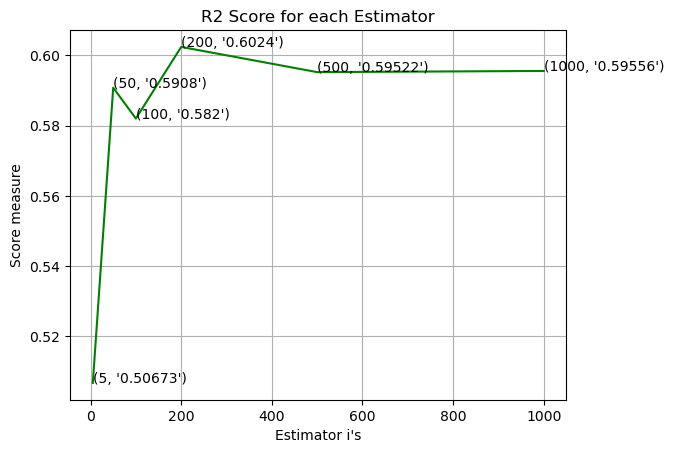

In [59]:
# Plotando Gráfico com os Resultados Anteriores
fig, ax = plt.subplots()
ax.plot(N_estimators, R2_score,c='g')
for i, txt in enumerate(np.round(R2_score,5)):
    ax.annotate((N_estimators[i],str(txt)), (N_estimators[i],R2_score[i]))
plt.grid()
plt.title("R2 Score for each Estimator")
plt.xlabel("Estimator i's")
plt.ylabel("Score measure")
plt.show()

In [72]:
# Utilizando Grid Search para Encontrar os Melhores Hiperparâmetros
param_grid = { 
    'n_estimators': [25, 50, 100, 150, 200], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}

grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
final_model = grid_search.fit(X2_train_scaled, y2_train) 
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=9,
                      n_estimators=50)


In [74]:
# Treinando o Modelo com os Hiperparâmetros Encontrados
y_pred_grid = final_model.predict(X2_test_scaled)
r2_score(y2_test, y_pred_grid)

0.35506826436477223

## XGBRegressor

In [62]:
# Criando Modelo Utilizando o Algoritmo XGBRegressor
model = XGBRegressor(n_estimators=200, max_depth=6, eval_metric=["auc", "error", "error@0.6"])

In [63]:
model.fit(X2_train_scaled, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=['auc', 'error', 'error@0.6'], feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
prediction = model.predict(X2_test_scaled)

In [65]:
print(r2_score(y2_test, prediction))

0.12882567633278474


In [66]:
# Calculando Métricas R2, MSE e MAE
print("R2", r2_score(y2_test, prediction))

print("MSE", mean_squared_error(y2_test, prediction))

print("MAE", mean_absolute_error(y2_test, prediction))

R2 0.12882567633278474
MSE 0.07268891675367437
MAE 0.204900615906047


<a id="section7"></a>
## Introduzindo Novos Dados

In [83]:
questao4 = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28341469'}

In [84]:
def novos_dados(x):
    new_data = list(x)
    df_novos_dados = pd.DataFrame(new_data)
    df_novos_dados = df_novos_dados[['No_of_Votes', 'Gross', 'Meta_score']]
    df_novos_dados['Gross'] = pd.to_numeric(df_novos_dados['Gross'])
    y_pred_grid = final_model.predict(df_questao4)
    
print(y_pred_grid)

[8.72553474]


<a id="section8"></a>
# Entregas

### 1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

De acordo com a seção [5. Análise Exploratória de Dados (EDA)](#section5), algumas análises e hipóteses a serem consideradas são:

- Foram criados intervalos em algumas variáveis para melhor análise.
<br>
<br>
- IMDB_Rating, No_of_Votes e Gross contém outliers de acordo com os boxplots.
<br>
<br>
- Os outliers foram mantidos, pois se tratando do caso em questão (filmes), pode ser considerada uma situação normal.
<br>
<br>
- IMDB_Rating, No_of_Votes e Gross não tem uma distribuição normal de acordo com os gráficos de distibuição e com desvio à direita (positivo).
<br>
<br>
- A maior quantidade de filmes foi produzida no período entre 2001 e 2010.
<br>
<br>
- A maioria dos filmes tem certificação do tipo U (sem restrição de público de acordo com o site https://www.cbfcindia.gov.in/cbfcAdmin/certification.php#:~:text=Initially%2C%20there%20were%20only%20two,and%20%E2%80%9CS%E2%80%9D%20(restricted%20to
<br>
<br>
- Os filmes tem em sua maioria entre 101 a 120 minutos de duração e em média 124 minutos.
<br>
<br>
- A média de notas do IMBD é de 7.94, e a maioria das notas é de 7.7.
<br>
<br>
- Os meta_scores em sua maioria estão entre 71 e 80, e média de 77.15.
<br>
<br>
- De acordo com a nuvem de palavras criada, algumas das palavras contidas nas sinopses do filme mais utilizadas são Life, Man e Young.
<br>
<br>
- Na análise bivariada podemos ver que se tem baixas correlações entre a maioria das variáveis, o que pode resultar em baixo rendimento dos modelos de aprendizado de máquina.

### 2. Responda também às seguintes perguntas:
**a.	Qual filme você recomendaria para uma pessoa que você não conhece?**
   
   - Para essa análise, deve-se levar em consideração três fatores: nota do IMDB, Meta Score e Número de Votos. Sendo assim, 3 opções de filmes que apresentam números balanceados são The Godfather, The Dark Knight e Pulp Fiction. Tendo o primeiro, a maior nota entre os três, o segundo, o maior número de votos, e o terceiro, com vantagens e desvantagens em relação aos outros.
<br>
<br>
   - Feita essa análise, o filme escolhido seria The Godfather, pois apesar de um número mais baixo de votos, apresenta maiores notas, inclusive o Meta Score que é uma média ponderada das críticas. Pode ser que com um número maior de votos, essas notas diminuíssem, mas também poderia aumentar, o que também poderia acontecer com os outros. Dito isto, reafirmo a escolha sendo The Godfather.

**b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**
- Em tese, na vida real, alguns fatores que tornam a expectativa de alto faturamento de um filme estão relacionados com o diretor e os atores, porém, na matriz de correlação da análise bivariada, podemos ver que eles tem pouca correlação com o faturamento. Sendo as variáveis com maior relação com o faturamento o Gênero, Certificação, Número de Votos, Nota do IMDB e Ano de Estreia.

**c.	Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**
- Como foi visto na análise da coluna Overview através da nuvem de palavras, podemos detectar as palavras mais utilizadas nas sinopses dos filmes.
<br>
<br>
- Sim, seria possível inferir o gênero do filme a partir dessa coluna utilizando processamento de linguagem natural, bibliotecas como NLTK, métodos de tokenização e TF-IDF, para assim criar um modelo capaz de classificar os gêneros dos filmes baseados no Overview.

### 3.	Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


- Assim como foi feito na seção [6. Machine Learning](#section6), a previsão da nota IMDB foi feita utilizando alguns modelos de aprendizado de máquina como Regressão Linear, Random Forest e XGBRegressor.
<br>
<br>
- Foram escolhidos previamente dois conjuntos de variáveis, o segundo conjunto foi escolhido contendo as variáveis No_of_Votes, Gross e Meta_score. Esse conjunto foi escolhido por ter resultados parecidos com o primeiro e se tratar de um modelo mais simples. Essas variáveis foram escolhidas por terem melhor correlação com a variável alvo (nota do IMDB), de acordo com a matriz de correlação e a seleção de variáveis Random Forest.
<br>
<br>
- O tipo de problema resolvido é de regressão.
<br>
<br>
- O modelo que apresentou melhor performance foi com o algoritmo Random Forest e hiper-parâmetros max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=50, encontrados através do Grid Search. O modelo apresentou boa performance, levando em consideração a quantidade de dados disponíveis e correlação entre as variáveis. Alguns pontos positivos deste modelo são sua capacidade de lidar com outliers e robustez contra ruídos. Alguns pontos negativos podem estar relacionados são baixa interpretabilidade e problemas com overfitting.
<br>
<br>
- A medida de performance escolhida foi a R², também conhecida como coeficiente de determinação, sendo escolhida por ser a métrica mais comum utilizada para comparação de performance.

### 4.	Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


#### Qual seria a nota do IMDB?
- Como demonstrado na seção [7. Introduzindo Novos Dados](#section7), utilizando o modelo escolhido, a nota do IMDB com esses novos dados seria de 8.7

### 5. Salve o modelo desenvolvido no formato .pkl.

In [76]:
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))